In [40]:
from utils import utils
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = plt.imread('1.jpg')

img.shape

(538, 640, 3)

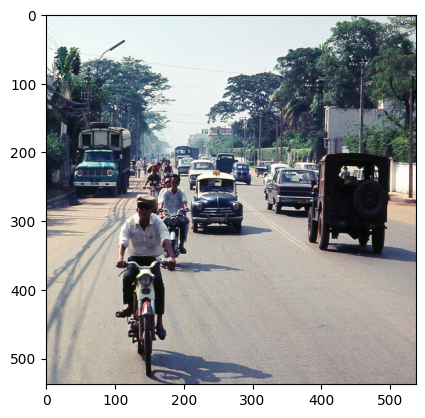

In [41]:
img = cv2.resize(img, (538, 538))
plt.imshow(img)

In [42]:
import torch
perm = utils.Permutar(538,1)
img = np.transpose(img,(2,0,1))
img = np.expand_dims(img,axis=0)
print(img.shape)

img_permuted = perm.desordenar(torch.from_numpy(img)).squeeze(0).numpy()


(1, 3, 538, 538)


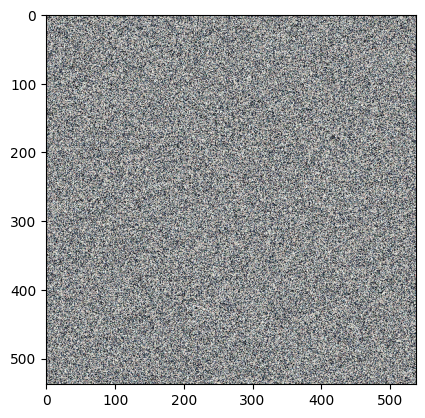

In [43]:
plt.imshow(img_permuted.transpose(1, 2, 0))
plt.imsave('1_permuted.png', img_permuted.transpose(1, 2, 0))

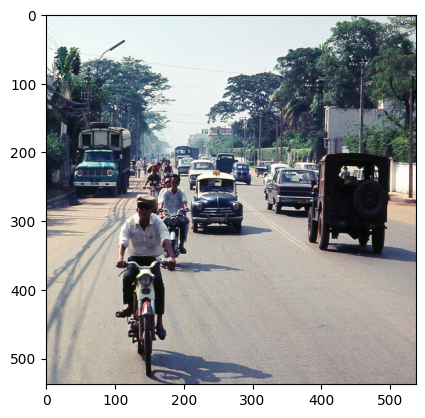

In [45]:
ordered = perm.ordenar(torch.from_numpy(img_permuted).unsqueeze(0)).numpy()
plt.imshow(ordered.squeeze().transpose(1, 2, 0))

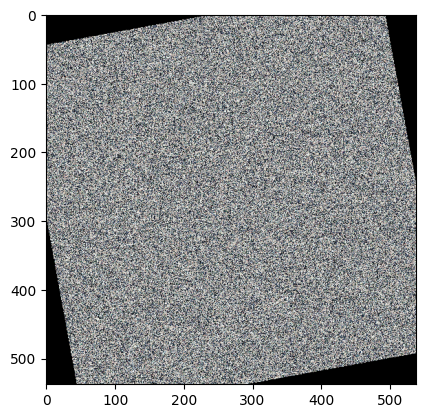

In [48]:
from torchvision import transforms

tfs = transforms.Compose([
    #transforms.ToPILImage(),
    #transforms.RandomCrop(32, padding=4),
    #transforms.CenterCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

imgs = tfs(transforms.functional.to_pil_image(img_permuted.squeeze().transpose(1, 2, 0)))
plt.imshow(imgs.numpy().transpose(1, 2, 0))

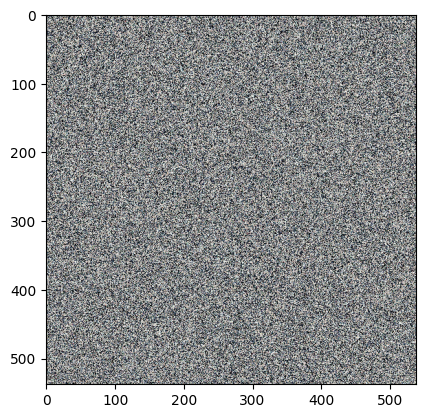

In [50]:
ordered = perm.ordenar(imgs.unsqueeze(0)).numpy()
plt.imshow(ordered.squeeze().transpose(1, 2, 0))